In [1]:
%pip install tensorflow==2.14.0 opencv-python mediapipe matplotlib pandas sklearn matplotlib



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


In [3]:
def mediapipe_detection(img,model):
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGR to RGB
    image.flags.writeable = False
    res = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #RGB to BGR
    return image,res

In [4]:
def draw_landmarks(image,results):
    #mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
    #                        mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
    #                        mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    
    #mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
    #                          mp_drawing.DrawingSpec(color=(80,22,10),thickness=1,circle_radius=1),
    #                          mp_drawing.DrawingSpec(color=(80,44,121),thickness=1,circle_radius=1))
    
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1))
    
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(245,66,230),thickness=1,circle_radius=1))

In [46]:
cap = cv2.VideoCapture(0)
aa = 2
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    ret,frame = cap.read()

    image , results = mediapipe_detection(frame,holistic) #detection

    draw_landmarks(image,results) #landmarks

    cv2.imshow('OpenCV Feed',image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()    

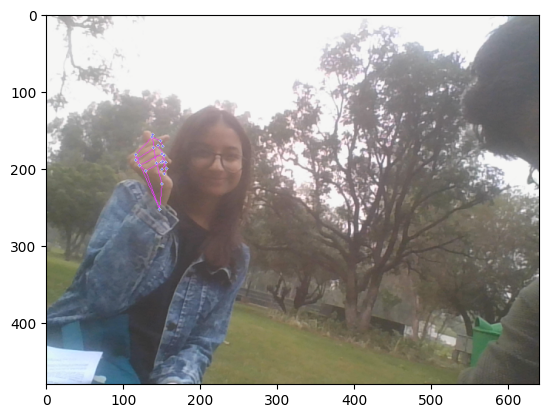

In [6]:
draw_landmarks(frame,results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

Extracting Keypoints

In [5]:
def extract_keypoints(results):
    #pose = np.array([[res.x,res.y,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

    #face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([lh,rh])

In [8]:
results.pose_landmarks

landmark {
  x: 0.3649531602859497
  y: 0.41803446412086487
  z: -0.44786301255226135
  visibility: 0.9988352060317993
}
landmark {
  x: 0.37560316920280457
  y: 0.39222532510757446
  z: -0.40899497270584106
  visibility: 0.998469889163971
}
landmark {
  x: 0.3833363652229309
  y: 0.39422714710235596
  z: -0.4092654585838318
  visibility: 0.9985649585723877
}
landmark {
  x: 0.3908422887325287
  y: 0.3964821696281433
  z: -0.409372478723526
  visibility: 0.9981980919837952
}
landmark {
  x: 0.3498219847679138
  y: 0.389168381690979
  z: -0.4462015628814697
  visibility: 0.9987300634384155
}
landmark {
  x: 0.3384796380996704
  y: 0.388650119304657
  z: -0.44653505086898804
  visibility: 0.9990360140800476
}
landmark {
  x: 0.32670456171035767
  y: 0.388130784034729
  z: -0.44694748520851135
  visibility: 0.9990147948265076
}
landmark {
  x: 0.3914799690246582
  y: 0.41954898834228516
  z: -0.16522221267223358
  visibility: 0.99782794713974
}
landmark {
  x: 0.30220240354537964
  y: 0.4

Storage Collection

In [128]:
Data_path = os.path.join('MP_Data')
# "Ok","Hello","Yo","ILoveU","Nice","Fuck Off","Call Me"
actions = np.array(["Ok","Hello","Yo","ILoveU","Nice","Fuck Off","Call Me"])
no_seq = 30
seq_len = 10

In [104]:
for action in actions:
    for seq in range(no_seq):
        try:
            os.makedirs(os.path.join(Data_path,action,str(seq)))
        except:
            pass    

In [129]:
actions

array(['Ok', 'Hello', 'Yo', 'ILoveU', 'Nice', 'Fuck Off', 'Call Me'],
      dtype='<U8')

In [68]:
cap.release()
cv2.destroyAllWindows() 

In [106]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
  for action in actions:
    for seq in range(no_seq):
      for frame_num in range(seq_len):

        ret,frame = cap.read()
        image , results = mediapipe_detection(frame,holistic) #detection
        draw_landmarks(image,results) #landmarks
        print(results)
        print("   *******   ")
        #break Logic'
        if frame_num == 0:
          cv2.putText(image,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
          cv2.putText(image,'COLLECTING FRAMES FOR {} VIDEO NO {}'.format(action.upper(),seq+1),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)

          cv2.waitKey(500)
        else:
          cv2.putText(image,'COLLECTING FRAMES FOR {} VIDEO NO {}'.format(action.upper(),seq+1),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
        
        keypoints = extract_keypoints(results)
        npy_path = os.path.join(Data_path,action,str(seq),str(frame_num))
        np.save(npy_path,keypoints)


        cv2.imshow('OpenCV Feed',image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
  cap.release()
  cv2.destroyAllWindows()    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class 'mediapipe.python.solution_base.SolutionOutputs'>
   *******   
<class

Preprocessing Data

In [130]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [131]:
label_map = {label:num for num,label in enumerate(actions)}
label_map

{'Ok': 0,
 'Hello': 1,
 'Yo': 2,
 'ILoveU': 3,
 'Nice': 4,
 'Fuck Off': 5,
 'Call Me': 6}

In [132]:
seqs , labels = [],[]
for action in actions:
    for seq in range(no_seq):
        window = []
        for frame_num in range(seq_len):
            res = np.load(os.path.join(Data_path,action,str(seq),"{}.npy".format(frame_num)))
            window.append(res)
        seqs.append(window)
        labels.append(label_map[action])    

In [133]:
np.array(seqs).shape

(210, 10, 126)

In [134]:
X = np.array(seqs)
Y = to_categorical(labels).astype(int)
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [135]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1)

Build and Train LSTM Neural Network

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [138]:
log_dir = os.path.join('Log')
tb_callback = TensorBoard(log_dir=log_dir)

In [139]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(seq_len,126)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [140]:
X.shape

(210, 10, 126)

In [141]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [146]:
model.fit(X_train,Y_train,epochs=60,callbacks=[tb_callback])

Epoch 1/60
6/6 [==============================] - 5s 58ms/step - loss: 1.9318 - categorical_accuracy: 0.1905
Epoch 2/60
6/6 [==============================] - 0s 57ms/step - loss: 1.8441 - categorical_accuracy: 0.2063
Epoch 3/60
6/6 [==============================] - 0s 35ms/step - loss: 1.7390 - categorical_accuracy: 0.2857
Epoch 4/60
6/6 [==============================] - 0s 34ms/step - loss: 1.6880 - categorical_accuracy: 0.2698
Epoch 5/60
6/6 [==============================] - 0s 61ms/step - loss: 1.6033 - categorical_accuracy: 0.2698
Epoch 6/60
6/6 [==============================] - 0s 55ms/step - loss: 1.4688 - categorical_accuracy: 0.3492
Epoch 7/60
6/6 [==============================] - 0s 54ms/step - loss: 1.2700 - categorical_accuracy: 0.5238
Epoch 8/60
6/6 [==============================] - 0s 46ms/step - loss: 1.0047 - categorical_accuracy: 0.6243
Epoch 9/60
6/6 [==============================] - 0s 32ms/step - loss: 0.8997 - categorical_accuracy: 0.6243
Epoch 10/60
6/6 [==

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 64)            48896     
                                                                 
 lstm_7 (LSTM)               (None, 10, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 203591 (795.28 KB)
Trainable params: 203

Make Predictions

In [147]:
res =  model.predict(X_test)

1/1 [==============================] - 0s 67ms/step


Saving Weights

In [25]:
model.save('action.h5')

c:\Users\SUNIL KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluting Using Confusion Matrix

In [148]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [149]:
yhat = model.predict(X_test)
ytrue = np.argmax(Y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()
multilabel_confusion_matrix(ytrue,yhat)

1/1 [==============================] - 0s 43ms/step


array([[[18,  1],
        [ 0,  2]],

       [[16,  0],
        [ 1,  4]],

       [[18,  0],
        [ 0,  3]],

       [[16,  0],
        [ 0,  5]],

       [[20,  0],
        [ 0,  1]],

       [[19,  1],
        [ 0,  1]],

       [[17,  0],
        [ 1,  3]]], dtype=int64)

In [150]:
accuracy_score(ytrue,yhat)


0.9047619047619048


Real Time Test

In [151]:
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    ret,frame = cap.read()

    image , results = mediapipe_detection(frame,holistic) #detection

    draw_landmarks(image,results) #landmarks



    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-seq_len:]

    if len(sequence)==seq_len:
      res = model.predict(np.expand_dims(sequence,axis=0))[0]
      print(actions[np.argmax(res)])
      cv2.rectangle(image,(5,5),(250,40),(255,0,0),-1)
      cv2.rectangle(image,(2,2),(253,43),(255,0,0),2)
      cv2.putText(image,' '.join((actions[np.argmax(res)]).capitalize()),(15,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)



    cv2.imshow('OpenCV Feed',image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()    

1/1 [==============================] - 0s 37ms/step
Yo
1/1 [==============================] - 0s 35ms/step
Yo
1/1 [==============================] - 0s 33ms/step
Yo
1/1 [==============================] - 0s 32ms/step
Yo
1/1 [==============================] - 0s 31ms/step
Yo
1/1 [==============================] - 0s 33ms/step
Yo
1/1 [==============================] - 0s 32ms/step
Yo
1/1 [==============================] - 0s 34ms/step
Yo
1/1 [==============================] - 0s 32ms/step
Yo
1/1 [==============================] - 0s 27ms/step
Yo
1/1 [==============================] - 0s 31ms/step
Yo
1/1 [==============================] - 0s 33ms/step
Hello
1/1 [==============================] - 0s 47ms/step
Hello
1/1 [==============================] - 0s 34ms/step
Hello
1/1 [==============================] - 0s 31ms/step
Hello
1/1 [==============================] - 0s 37ms/step
Hello
1/1 [==============================] - 0s 32ms/step
Hello
1/1 [==============================] - 0s 30ms/

In [70]:
cap.release()
cv2.destroyAllWindows()   